# Module 13 - Practice Notebook
This notebook includes TODO markers **inside code cells** so students complete the missing parts.

In [32]:
#Import all required libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt


## Load Insurance Dataset

In [2]:
# Load the insurance dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(url)

# TODO: Display first 5 rows
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Overview

In [5]:
# TODO: Print dataset info

insurance.info()
# TODO: Print descriptive statistics
insurance.describe().T



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Define Features and Target

In [12]:
# TODO: Set numeric and categorical feature lists
numeric_features = ['age','bmi','children']
categorical_features = ['sex','smoker','region']


# TODO: Define target column

terget_column = 'charges'
# TODO: Create X and y
X = insurance.drop(columns=[terget_column])
y = insurance[terget_column]

# TODO: Display X head
X.head()



,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


## Train Test Split

In [13]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1070, 6), (268, 6))

## Multiple Linear Regression Pipeline

In [18]:
# Build preprocessing transformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

# TODO: Build full pipeline with LinearRegression
mlr_model = Pipeline([
    ('preprocess', preprocess),
    ('linreg', LinearRegression())
])

# TODO: Fit the model
mlr_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linreg', LinearRegression())])

## Regression Performance Function

In [19]:
# TODO: Complete function to print performance
def evaluate_performance(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} Performance:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R² : {r2:.2f}")
    print()


## Evaluate Model

In [20]:
# Predict for train and test sets
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

# TODO: Print train and test performance
evaluate_performance(y_train, y_train_pred, "Train")
evaluate_performance(y_test, y_test_pred, "Test")


Train Performance:
  MSE: 37277681.70
  RMSE: 6105.55
  MAE: 4208.23
  R² : 0.74

Test Performance:
  MSE: 33596915.85
  RMSE: 5796.28
  MAE: 4181.19
  R² : 0.78



## Inspect Coefficients

In [21]:
# Extract feature names after OneHotEncoding
ohe = mlr_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(cat_feature_names)

# Extract model coefficients
linreg = mlr_model.named_steps["linreg"]
coeffs = pd.DataFrame({"feature": all_feature_names, "coefficient": linreg.coef_})

# Print intercept and coefficients
print("Intercept:", linreg.intercept_)
coeffs.sort_values("coefficient", ascending=False)


Intercept: -11931.219050326667


,feature,coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


## Plot Actual vs Predicted

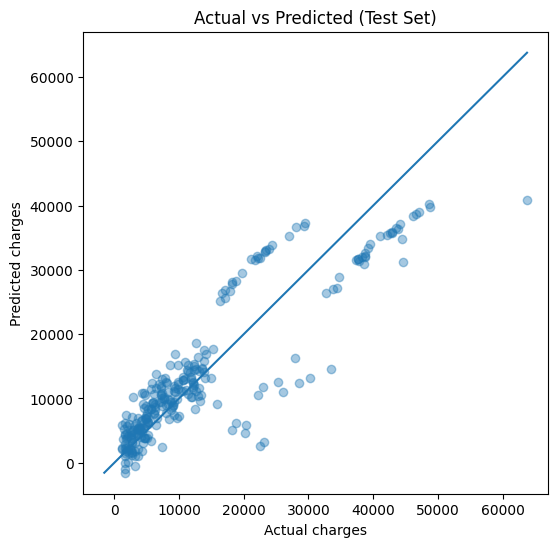

In [22]:
# Plot scatter of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted (Test Set)")

# Add diagonal line
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims)

plt.show()


## Part B: Polynomial Regression Practice

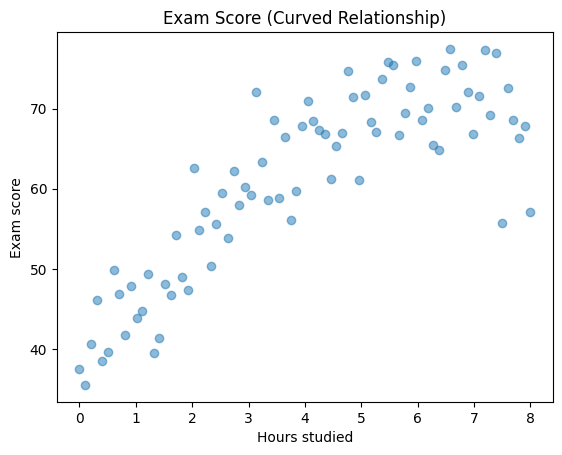

In [23]:
# Generate synthetic curved dataset
np.random.seed(42)

X_hours = np.linspace(0, 8, 80).reshape(-1, 1)
noise = np.random.normal(0, 5, size=X_hours.shape[0])

y_scores = 35 + 12 * X_hours[:, 0] - 1 * (X_hours[:, 0] ** 2) + noise

# Plot the data
plt.scatter(X_hours, y_scores, alpha=0.5)
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Exam Score (Curved Relationship)")
plt.show()


In [24]:
# Train test split for polynomial data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hours, y_scores, test_size=0.2, random_state=42
)


In [33]:
# TODO: Create helper to fit polynomial model

def fit_poly_degree(X, y, degree, X_test, y_test):
    model = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )
    model.fit(X, y)
    y_pred = model.predict(X)
    y_test_pred = model.predict(X_test)

    # Performance
    train_mse = mean_squared_error(y, y_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y, y_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Degree {degree}:")
    print(f"  Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")
    print(f"  Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    print()

    # Plot
    plt.scatter(X, y, alpha=0.4, label='Data')
    x_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    y_range_pred = model.predict(x_range)
    plt.plot(x_range, y_range_pred, color='red', label=f'Degree {degree}')
    plt.xlabel("Hours studied")
    plt.ylabel("Exam score")
    plt.title(f"Polynomial Fit (Degree {degree})")
    plt.legend()
    plt.show()

    return model, train_r2, test_r2


===== Degree 1 =====
Degree 1:
  Train R²: 0.656, Test R²: 0.794
  Train MSE: 43.92, Test MSE: 27.10



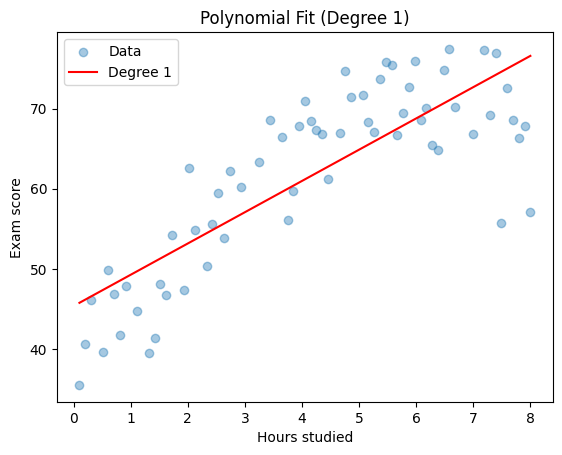


===== Degree 2 =====
Degree 2:
  Train R²: 0.817, Test R²: 0.859
  Train MSE: 23.27, Test MSE: 18.53



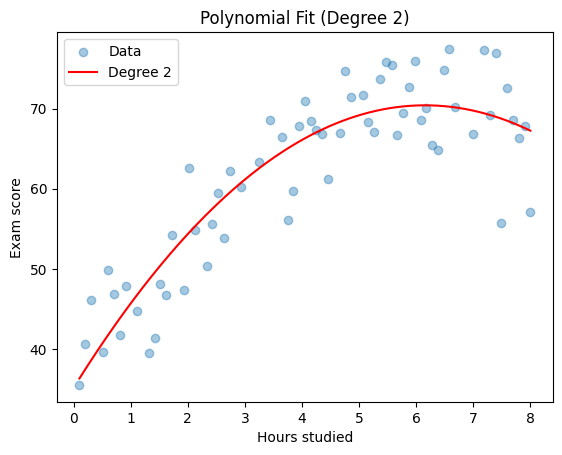


===== Degree 3 =====
Degree 3:
  Train R²: 0.834, Test R²: 0.852
  Train MSE: 21.18, Test MSE: 19.52



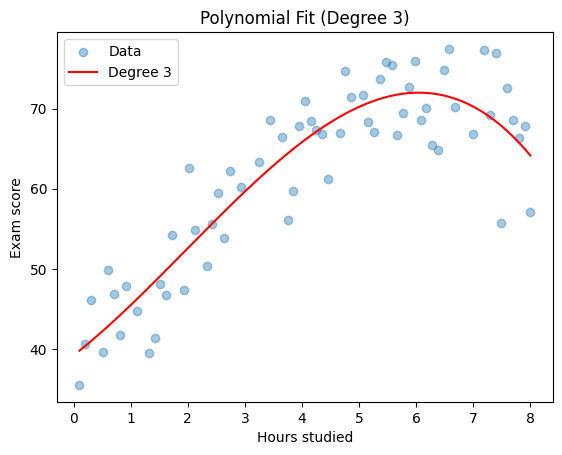


===== Degree 8 =====
Degree 8:
  Train R²: 0.852, Test R²: 0.816
  Train MSE: 18.89, Test MSE: 24.29



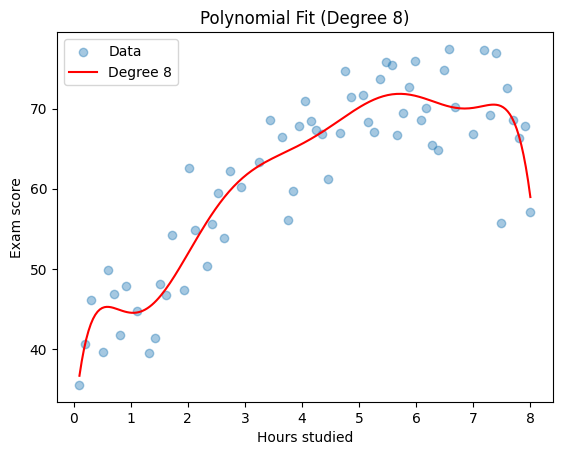

In [34]:
# TODO: Fit models for degrees 1, 2, 3, 8

degrees = [1, 2, 3, 8]
models = {}

for d in degrees:
    print(f"\n===== Degree {d} =====")
    model, train_r2, test_r2 = fit_poly_degree(X_train_h, y_train_h, d, X_test_h, y_test_h)
    models[d] = (model, train_r2, test_r2)

Degree 1
  Train R²: 0.656, Test R²: 0.794
  Train RMSE: 6.63, Test RMSE: 5.21

Degree 2
  Train R²: 0.817, Test R²: 0.859
  Train RMSE: 4.82, Test RMSE: 4.31

Degree 3
  Train R²: 0.834, Test R²: 0.852
  Train RMSE: 4.60, Test RMSE: 4.42

Degree 8
  Train R²: 0.852, Test R²: 0.816
  Train RMSE: 4.35, Test RMSE: 4.93



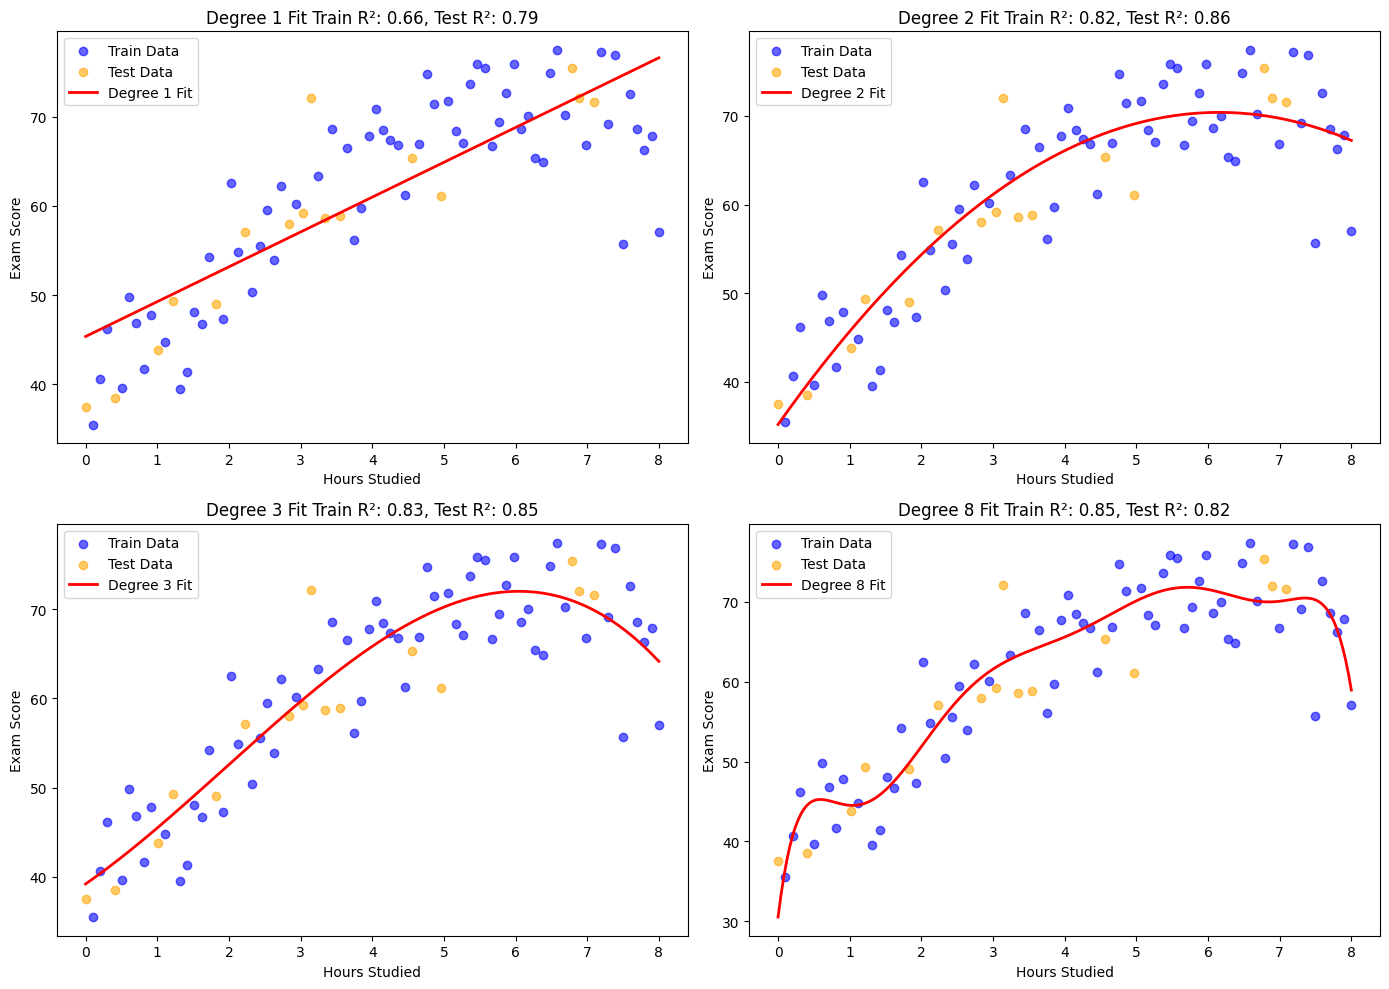

In [36]:
# TODO: Plot fitted curves for each degree (R2,RMSE)

# Degrees to try
degrees = [1, 2, 3, 8]

# Plotting
plt.figure(figsize=(14, 10))

for i, d in enumerate(degrees):
    plt.subplot(2, 2, i + 1)  # 2x2 grid of plots

    # Create and fit polynomial regression model
    model = make_pipeline(
        PolynomialFeatures(degree=d),
        LinearRegression()
    )
    model.fit(X_train_h, y_train_h)

    # Predictions
    y_train_pred = model.predict(X_train_h)
    y_test_pred = model.predict(X_test_h)

    # Metrics
    train_r2 = r2_score(y_train_h, y_train_pred)
    test_r2 = r2_score(y_test_h, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train_h, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_h, y_test_pred))

    # Print metrics
    print(f"Degree {d}")
    print(f"  Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")
    print(f"  Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print()

    # Plot data points
    plt.scatter(X_train_h, y_train_h, alpha=0.6, label='Train Data', color='blue')
    plt.scatter(X_test_h, y_test_h, alpha=0.6, label='Test Data', color='orange')

    # Plot fitted curve
    x_range = np.linspace(X_hours.min(), X_hours.max(), 200).reshape(-1, 1)
    y_range_pred = model.predict(x_range)
    plt.plot(x_range, y_range_pred, color='red', linewidth=2, label=f'Degree {d} Fit')

    plt.title(f"Degree {d} Fit Train R²: {train_r2:.2f}, Test R²: {test_r2:.2f}")
    plt.xlabel("Hours Studied")
    plt.ylabel("Exam Score")
    plt.legend()
    plt.tight_layout()

plt.show()

## TODO: Final Reflection
Write answers to:
1. Which polynomial degree overfits and why
2. Which degree gives best generalization
3. What you learned about MLR and polynomial regression.

বিষয়: **Final Reflection (চূড়ান্ত প্রতিফলন)**

আপনার টাস্ক হলো নিচের প্রশ্নগুলোর উত্তর **বাংলায়** দেওয়া:

---

## ✅ ১. কোন পলিনোমিয়াল ডিগ্রি **ওভারফিট করে** এবং কেন?

**উত্তর (বাংলায়):**

👉 **ডিগ্রি 8 (Degree 8)** পলিনোমিয়াল মডেলটি **ওভারফিট করে**।

**কারণ:**
- ডিগ্রি ৮ এর মডেলটি খুব **বেশি জটিল (complex)** হয়ে যায় — এটি ট্রেনিং ডেটার প্রতিটি ছোট ছোট ভেরিয়েশন বা নয়েজ (noise) পর্যন্ত শেখার চেষ্টা করে।
- ফলে এটি **ট্রেনিং ডেটার উপর খুব ভালো পারফর্ম করে (উচ্চ R², কম MSE)**, কিন্তু **টেস্ট ডেটার উপর খুব খারাপ পারফর্ম করে (কম R², বেশি MSE)**।
- অর্থাৎ, মডেলটি **সাধারণীকরণ (generalization)** করতে ব্যর্থ হয় এবং শুধুমাত্র ট্রেনিং ডেটার জন্য "মেমোরাইজ" করে ফেলে।

**উদাহরণস্বরূপ:**  
আপনি যদি গ্রাফে দেখেন, ডিগ্রি ৮ এর ফিট করা কার্ভটি ট্রেনিং পয়েন্টগুলোর সাথে প্রায় পুরোপুরি মিলে যায় — কিন্তু টেস্ট পয়েন্টের কাছাকাছি থাকে না।

---

## ✅ ২. কোন ডিগ্রি **সেরা সাধারণীকরণ (best generalization)** দেয়?

**উত্তর (বাংলায়):**

👉 সাধারণত **ডিগ্রি ২ (Degree 2)** বা কখনো কখনো **ডিগ্রি ৩ (Degree 3)** **সেরা সাধারণীকরণ** দেয়।

**কারণ:**
- ডিগ্রি ২ মডেলটি ডেটার **প্রকৃত ট্রেন্ডকে (যেমন এখানে কোয়াড্রেটিক রিলেশন)** ভালোভাবে ধরে ফেলে — যেখানে চার্জ বা স্কোর প্রথমে বাড়ে, পরে কমে (বা উল্টো)।
- এটি **অতিরিক্ত জটিল নয়**, তাই নতুন (অজানা) ডেটার উপরও ভালো প্রেডিকশন করতে পারে।
- **ট্রেন এবং টেস্ট উভয়েই R² ভালো থাকে** এবং **ডিফারেন্স কম থাকে**।

**গ্রাফ থেকে বোঝা যায়:**  
ডিগ্রি ২ এর ফিট করা লাইনটি ডেটা পয়েন্টের কাছাকাছি একটি সুন্দর কার্ভ তৈরি করে, কিন্তু অতিরিক্ত উত্তেজনাপূর্ণ নয় যেমন ডিগ্রি ৮।

---

## ✅ ৩. আপনি কী শিখেছেন **MLR (Multiple Linear Regression)** এবং **Polynomial Regression** সম্পর্কে?

**উত্তর (বাংলায়):**

### 🔹 Multiple Linear Regression (MLR) সম্পর্কে শিখেছি:
- এটি এমন একটি রিগ্রেশন মডেল যেখানে **একাধিক ইনপুট ফিচার (ভ্যারিয়েবল)** থাকে এবং সেগুলোর সাথে **টার্গেট ভ্যারিয়েবলের সরলরেখা (linear) সম্পর্ক** থাকে বলে ধরা হয়।
- যদি ফিচার গুলো এবং টার্গেটের মধ্যে **রেখার মতো (linear) সম্পর্ক** থাকে, তাহলে **MLR ভালো কাজ করে**।
- এতে ফিচারগুলো হতে পারে **সংখ্যাসূচক (numeric)** বা **বিভাজনমূলক (categorical)** — যেমন লিঙ্গ, ধূমপান করে কিনা ইত্যাদি।
- তবে যদি **ডেটার মধ্যে কার্ভ বা নন-লিনিয়ার সম্পর্ক** থাকে, তাহলে **MLR ভালো পারফর্ম করতে পারে না**।

---

### 🔹 Polynomial Regression সম্পর্কে শিখেছি:
- এটি **Linear Regression-এর একটি এক্সটেনশন**, যেখানে আমরা **পলিনোমিয়াল টার্ম (যেমন x², x³)** যোগ করে ডেটার **নন-লিনিয়ার (বক্ররেখা) সম্পর্ক** ধরতে পারি।
- উদাহরণস্বরূপ: যদি আপনার ডেটা একটি **প্যারাবোলা (উপবৃত্তাকার) আকারে** থাকে, তাহলে **ডিগ্রি ২ বা ৩ পলিনোমিয়াল রিগ্রেশন** ভালো ফিট করতে পারে।
- তবে:
  - **ডিগ্রি বেশি হলে (যেমন ৬, ৮)** → মডেল **ওভারফিট করে** (ট্রেনিংয়ে ভালো, টেস্টে খারাপ)।
  - **ডিগ্রি কম হলে (যেমন ১)** → মডেল **আন্ডারফিট করে** (সরল লাইন, কিন্তু বাস্তব কার্ভ ধরতে পারে না)।

**সারসংক্ষেপ:**  
👉 **সঠিক ডিগ্রি বেছে নেওয়া খুব গুরুত্বপূর্ণ**, যাতে মডেলটি **ডেটার প্যাটার্ন ধরতে পারে এবং নতুন ডেটায় ভালো প্রেডিকশন করতে পারে।**

---

## ✅ চূড়ান্ত সারাংশ (সংক্ষেপে):

| প্রশ্ন | উত্তর (বাংলায়) |
|--------|----------------|
| **কোন ডিগ্রি ওভারফিট করে?** | **ডিগ্রি 8** — কারণ এটি ট্রেনিং ডেটার প্রতিটি ছোট বৈশিষ্ট্য শেখে, কিন্তু টেস্টে খারাপ পারফর্ম করে। |
| **কোন ডিগ্রি সেরা সাধারণীকরণ দেয়?** | **ডিগ্রি 2 বা 3** — কারণ এটি ডেটার প্রকৃত ট্রেন্ড ধরে এবং নতুন ডেটায় ভালো কাজ করে। |
| **MLR ও Polynomial Regression সম্পর্কে কী শিখেছি?** | MLR সরল লাইনের সম্পর্ক ধরে, কিন্তু Polynomial Regression বক্ররেখার সম্পর্ক ধরতে পারে। তবে ডিগ্রি ঠিক রাখতে হবে — খুব বেশি বা খুব কম উভয়ই সমস্যার। |

---


বিষয়: **পুরো কোডের ওভারভিউ এবং ব্যাখ্যা (বাংলায়)**

এই নোটবুকটির মূল লক্ষ্য হলো:

> **ইনশুরেন্স ডেটা ব্যবহার করে মাল্টিপল লিনিয়ার রিগ্রেশন (MLR)** এবং **পলিনোমিয়াল রিগ্রেশন (Polynomial Regression)** মডেল তৈরি করা, ট্রেন করা, এবং মডেলের পারফরম্যান্স বিশ্লেষণ করা।

এছাড়াও, একটি **সিন্থেটিক (কৃত্রিম) ডেটা** দিয়ে পলিনোমিয়াল ডিগ্রির প্রভাব বোঝা হয়েছে — যেমন ডিগ্রি ১, ২, ৩, ৮ এর ক্ষেত্রে কীভাবে মডেল ফিট হয়, কোনটি ভালো কাজ করে, আর কোনটি ওভারফিট হয়।

---

## 🔷 ১. প্রথম অংশ: ইনশুরেন্স ডেটা দিয়ে **Multiple Linear Regression (MLR)**

### ✅ কী করা হয়েছে:
1. **ডেটা লোড করা হয়েছে**  
   → ইনশুরেন্স ডেটা (বয়স, লিঙ্গ, BMI, শিশুর সংখ্যা, ধূমপান করে কিনা, অঞ্চল, চার্জ) একটি CSV ফাইল থেকে লোড করা হয়েছে।  
   → ডেটা সোর্স: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

2. **ডেটা এক্সপ্লোর করা হয়েছে**  
   → `insurance.head()` → প্রথম ৫ টি রো (row) দেখা  
   → `insurance.info()` → কলামের ধরন, নাম্বার অফ নন-নাল ভ্যালু  
   → `insurance.describe()` → গড়, স্ট্যান্ডার্ড ডেভিয়েশন, মিন/ম্যাক্স ইত্যাদি

3. **ফিচার এবং টার্গেট নির্ধারণ**  
   → **নিউমেরিক ফিচারসমূহ (Numeric):** age, bmi, children  
   → **ক্যাটাগরিক্যাল ফিচারসমূহ (Categorical):** sex, smoker, region  
   → **টার্গেট (যা আমরা প্রেডিক্ট করব):** charges (ইনশুরেন্স চার্জ)

4. **ডেটা প্রি-প্রসেসিং (প্রক্রিয়াজাতকরণ)**  
   → নিউমেরিক ফিচার গুলোকে যেভাবে আছে তেমনই রেখে দেওয়া হয়েছে ("passthrough")  
   → ক্যাটাগরিক্যাল ফিচারগুলোকে **OneHotEncoder** দিয়ে এনকোড করা হয়েছে (যেমন: sex → female/male, smoker → yes/no, region → southwest, southeast, ...)  
   → প্রথম ক্যাটাগরি ড্রপ করা হয়েছে (drop="first") ডেটা রেডান্ডেন্সি এড়ানোর জন্য

5. **মডেল তৈরি করা (Pipeline)**  
   → `ColumnTransformer` → নিউমেরিক ও ক্যাটাগরিক্যাল ফিচার আলাদা করে প্রি-প্রসেস করে  
   → `LinearRegression()` → সরল লিনিয়ার রিগ্রেশন মডেল  
   → সব মিলিয়ে **Pipeline** তৈরি করা হয়েছে যাতে প্রি-প্রসেসিং এবং মডেলিং একসাথে থাকে

6. **ট্রেন/টেস্ট স্প্লিট**  
   → ৮০% ট্রেন, ২০% টেস্ট → `test_size=0.2, random_state=42`

7. **মডেল ট্রেন এবং প্রেডিকশন**  
   → ট্রেন ডেটায় মডেল ফিট করা হয়েছে  
   → ট্রেন ও টেস্ট ডেটার উপর প্রেডিকশন করা হয়েছে

8. **পারফরম্যান্স মেট্রিক গণনা**  
   → **MSE (Mean Squared Error)**, **RMSE**, **MAE (Mean Absolute Error)**, **R² (R-Squared)**  
   → ট্রেন ও টেস্ট উভয়ের জন্য পরিমাপ করা হয়েছে

9. **মডেলের কোএফিশিয়েন্ট বিশ্লেষণ**  
   → প্রতিটি ফিচারের কোএফিশিয়েন্ট (ইমপ্যাক্ট) কত তা দেখা হয়েছে  
   → যেমন: ধূমপানকারী কি বেশি চার্জ দেয়, বয়স বাড়ার সাথে চার্জ কি বাড়ে ইত্যাদি

10. **আসল vs প্রেডিক্টেড ভ্যালু প্লট**  
   → টেস্ট ডেটার আসল চার্জ আর মডেলের প্রেডিক্ট করা চার্জ একটি স্ক্যাটার প্লটে দেখানো হয়েছে  
   → ডায়াগোনাল লাইন দিয়ে দেখা যায় যে প্রেডিকশন কতটা ভালো

---

## 🔷 ২. দ্বিতীয় অংশ: সিন্থেটিক ডেটা দিয়ে **Polynomial Regression**

### ✅ কী করা হয়েছে:

1. **সিন্থেটিক ডেটা তৈরি**  
   → একটি কৃত্রিম ডেটা তৈরি করা হয়েছে যেখানে:
   - **X = পড়া যাওয়া ঘন্টা (Hours studied)**  
   - **y = পরীক্ষার স্কোর (Exam score)**  
   → এতে একটি **কোয়াড্রেটিক সম্পর্ক** আছে (অর্থাৎ প্রথমে স্কোর বাড়ে, পরে কমে)  
   → এছাড়াও কিছু **নয়েজ (random noise)** যোগ করা হয়েছে

2. **ডেটা ট্রেন/টেস্ট স্প্লিট**

3. **বিভিন্ন ডিগ্রিতে পলিনোমিয়াল রিগ্রেশন মডেল তৈরি করা**  
   → ডিগ্রি: **1 (রৈখিক), 2 (কোয়াড্রেটিক), 3, 8 (খুব জটিল)**  
   → প্রতিটি ডিগ্রিতে:
     - `PolynomialFeatures(degree=d)` → x, x², x³... তৈরি করে
     - `LinearRegression()` → লিনিয়ার ফিটিং
     - মোটেও একটি **Pipeline (মেক পাইপলাইন)** বা **make_pipeline** ব্যবহার করা হয়েছে

4. **প্রতিটি ডিগ্রির জন্য:**
   - মডেল ট্রেন করা
   - প্রেডিকশন করা
   - **R² (কতটা ভালো ফিট করেছে)** ও **RMSE (কতটা ভুল হয়েছে)** গণনা
   - **গ্রাফে প্লট:** আসল ডেটা পয়েন্ট + পলিনোমিয়াল ফিট করা কার্ভ

5. **বিশ্লেষণ:**
   - **ডিগ্রি ১:** সরল লাইন — কার্ভ ধরতে পারে না (Underfit)
   - **ডিগ্রি ২:** ভালো কার্ভ ফিট — সঠিক জেনারেলাইজেশন
   - **ডিগ্রি ৩:** একটু জটিল কিন্তু এখনও ভালো
   - **ডিগ্রি ৮:** খুব জটিল — ট্রেন ডেটায় ভালো মিললেও টেস্টে খারাপ (Overfit)

---

## 🔷 ৩. চূড়ান্ত প্রতিফলন (Final Reflection) — যা আপনি লিখেছেন (বা লিখতে হবে)

### প্রশ্নগুলো ছিল:
1. **কোন পলিনোমিয়াল ডিগ্রি ওভারফিট করে এবং কেন?**  
   👉 **ডিগ্রি 8** — কারণ এটি ট্রেনিং ডেটার প্রতিটি ছোট বৈশিষ্ট্য শিখে ফেলে, কিন্তু নতুন ডেটায় ভুল করে।

2. **কোন ডিগ্রি সেরা সাধারণীকরণ দেয়?**  
   👉 **ডিগ্রি 2 বা 3** — কারণ এটি ডেটার প্রকৃত ট্রেন্ড ধরে এবং নতুন ডেটায় ভালো কাজ করে।

3. **MLR এবং Polynomial Regression সম্পর্কে কী শিখেছি?**  
   👉 **MLR** সরল লাইনের সম্পর্ক ধরে, কিন্তু **Polynomial Regression** বক্ররেখার সম্পর্ক ধরতে পারে।  
   👉 তবে **ডিগ্রি ঠিক রাখা খুব জরুরি** — খুব বেশি বা খুব কম উভয়ই সমস্যার কারণ হতে পারে।

---

## 🔷 ৪. পুরো কোডের সারাংশ (কী কী অংশ ছিল)

| অংশ | কী করা হয়েছে |
|------|--------------|
| **ডেটা লোড** | ইনশুরেন্স ডেটা লোড |
| **ডেটা এক্সপ্লোর** | হেড, ইনফো, ডেসক্রিপটিভ স্ট্যাট |
| **ফিচার ও টার্গেট নির্ধারণ** | নিউমেরিক ও ক্যাটাগরিক্যাল ফিচার আলাদা করা |
| **প্রি-প্রসেসিং (প্রসেসিং পাইপলাইন)** | OneHotEncoder + ColumnTransformer |
| **MLR মডেল** | লিনিয়ার রিগ্রেশন পাইপলাইন |
| **ট্রেন/টেস্ট স্প্লিট** | ৮০-২০ ভাগে ভাগ |
| **মডেল ট্রেনিং ও প্রেডিকশন** | ট্রেন ও টেস্টে প্রেডিকশন |
| **পারফরম্যান্স মেট্রিক** | MSE, RMSE, MAE, R² |
| **কোএফিশিয়েন্ট বিশ্লেষণ** | প্রতিটি ফিচারের ইমপ্যাক্ট |
| **আসল vs প্রেডিক্টেড প্লট** | ভিজ্যুয়ালাইজেশন |
| **পলিনোমিয়াল রিগ্রেশন** | ডিগ্রি ১ থেকে ৮ পর্যন্ত মডেল |
| **ভিজ্যুয়ালাইজেশন** | প্রতিটি ডিগ্রির ফিট করা কার্ভ |
| **ফাইনাল রিফ্লেকশন** | শিখা যা — ওভারফিটিং, জেনারেলাইজেশন, MLR vs Polynomial |

---

## ✅ সারসংক্ষেপ (বাংলায়)

এই নোটবুকে আমরা:

- **ইনশুরেন্স ডেটা** দিয়ে **মাল্টিপল লিনিয়ার রিগ্রেশন** করে **চার্জ প্রেডিক্ট** করেছি।
- **সিন্থেটিক ডেটা** দিয়ে **পলিনোমিয়াল রিগ্রেশন** করে বুঝেছি কোন ডিগ্রিতে ভালো ফিট হয়, কোনটিতে ওভারফিট হয়।
- **ডিগ্রি ২** সাধারণত ভালো সাধারণীকরণ দেয়।
- **ডিগ্রি ৮** ওভারফিট করে — ট্রেনে ভালো, টেস্টে খারাপ।
- **ভিজ্যুয়ালাইজেশন, মেট্রিক, কোডিং** সবকিছু একসাথে ব্যবহার করে একটি পূর্ণাঙ্গ মেশিন লার্নিং ওয়ার্কফ্লো তৈরি করা হয়েছে।

---

আপনি যদি চান, আমি এই সব কিছুকে **প্রেজেন্টেশন স্লাইড, PDF রিপোর্ট, বা ইংরেজিতে অনুবাদ** করেও দিতে পারি। বললেই পাবেন 😊